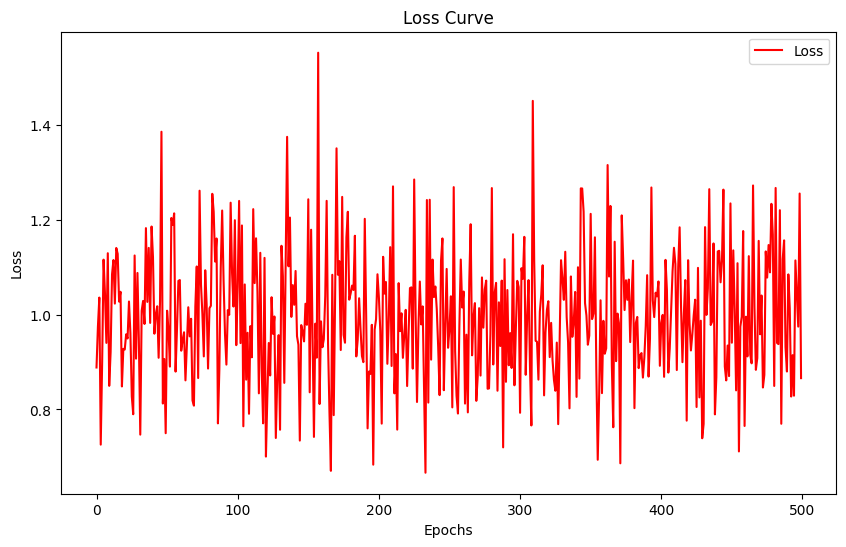

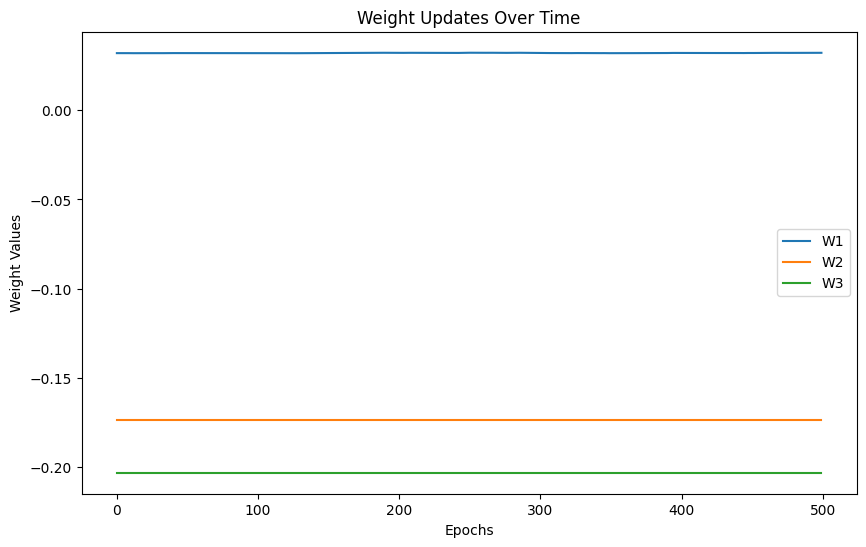

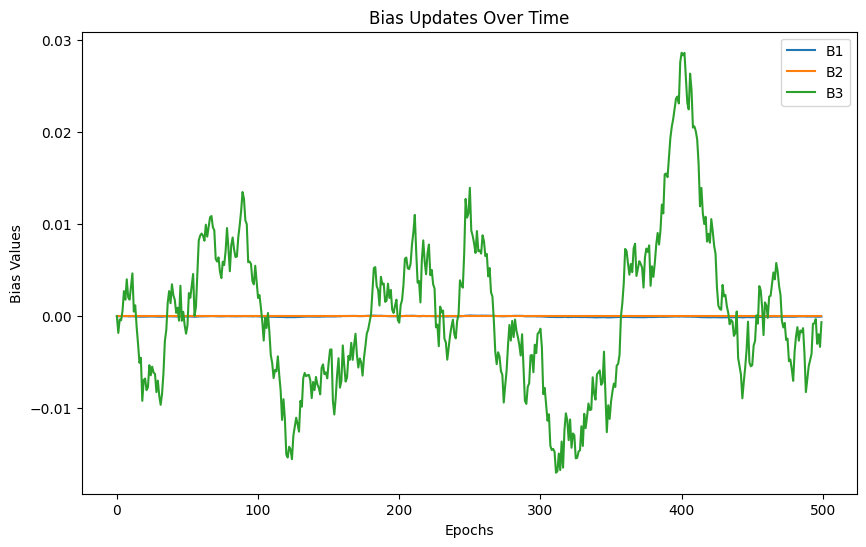

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define Neural Network Components
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Loss_MSE:
    def forward(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred, y_true):
        self.dinputs = 2 * (y_pred - y_true) / y_true.size

class Optimizer_SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases

# Training Configuration
epochs = 500
learning_rate = 0.01

# Initialize Model
optimizer = Optimizer_SGD(learning_rate)
dense1 = Layer_Dense(1, 2)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(2, 3)
activation2 = Activation_ReLU()
dense3 = Layer_Dense(3, 1)
loss_function = Loss_MSE()

# Storage for error curves
losses = []
weight_history = { "W1": [], "W2": [], "W3": [] }
bias_history = { "B1": [], "B2": [], "B3": [] }

# Training Loop
for epoch in range(epochs):
    X = np.random.randn(100, 1)  # Random input
    y = np.random.randn(100, 1)  # Random output

    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)

    # Compute Loss
    loss = loss_function.forward(dense3.output, y)
    losses.append(loss)

    # Store Weights and Biases
    weight_history["W1"].append(dense1.weights.copy())
    weight_history["W2"].append(dense2.weights.copy())
    weight_history["W3"].append(dense3.weights.copy())

    bias_history["B1"].append(dense1.biases.copy())
    bias_history["B2"].append(dense2.biases.copy())
    bias_history["B3"].append(dense3.biases.copy())

    # Backward Pass
    loss_function.backward(dense3.output, y)
    dense3.backward(loss_function.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update Parameters
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)

# Plot Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# Plot Weight Curves
plt.figure(figsize=(10, 6))
for key, values in weight_history.items():
    plt.plot([w[0, 0] for w in values], label=key)
plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.title("Weight Updates Over Time")
plt.legend()
plt.show()

# Plot Bias Curves
plt.figure(figsize=(10, 6))
for key, values in bias_history.items():
    plt.plot([b[0, 0] for b in values], label=key)
plt.xlabel("Epochs")
plt.ylabel("Bias Values")
plt.title("Bias Updates Over Time")
plt.legend()
plt.show()


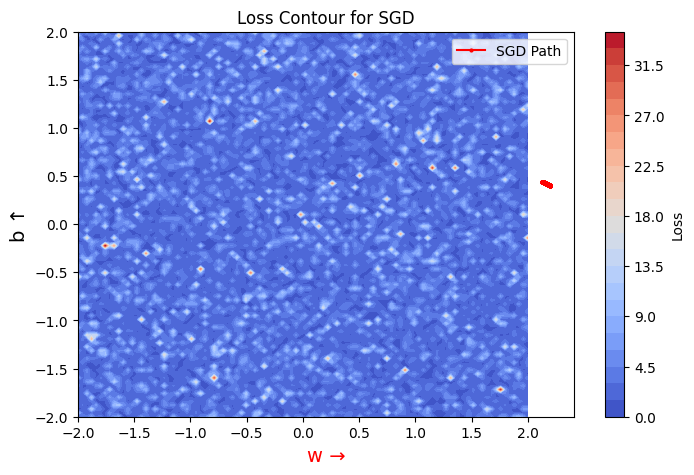

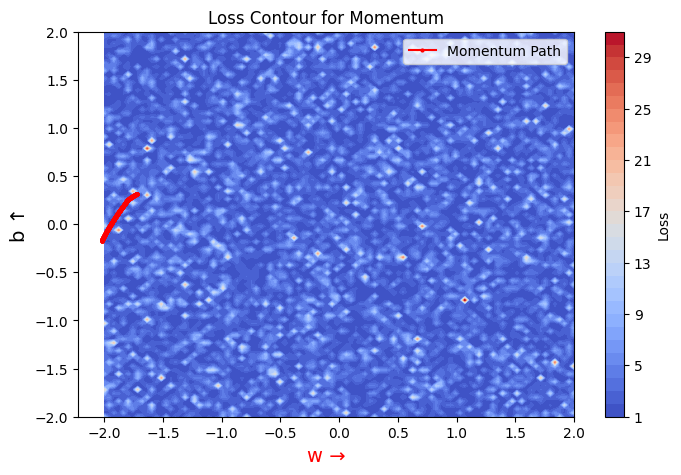

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk

# Generate synthetic regression data
np.random.seed(42)
X = np.random.uniform(-5, 5, (100, 2))  # Two input features
y = (np.sin(X[:, 0]) + np.cos(X[:, 1]) + 0.1 * np.random.randn(100)).reshape(-1, 1)  # Reshape for proper alignment

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size=2, hidden1_size=3, hidden2_size=3, output_size=1, learning_rate=0.01, optimizer='SGD'):
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        
        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.random.randn(1, hidden1_size)
        self.w2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.random.randn(1, hidden2_size)
        self.w3 = np.random.randn(hidden2_size, output_size)
        self.b3 = np.random.randn(1, output_size)
        
        # Momentum terms
        self.v_w1 = np.zeros_like(self.w1)
        self.v_b1 = np.zeros_like(self.b1)
        self.beta = 0.9  # Momentum factor
        
        # Store weight and bias updates for visualization
        self.w1_history, self.b1_history = [], []
        self.loss_history = []
        
    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.w3) + self.b3
        self.output = self.z3  # Linear activation in final layer (Regression)
        return self.output
    
    def backward(self, X, y):
        m = X.shape[0]
        loss = np.mean((self.output - y) ** 2)
        self.loss_history.append(loss)
        
        # Store weights and biases for visualization
        self.w1_history.append(self.w1[0, 0])  # Track first weight component
        self.b1_history.append(self.b1[0, 0])
        
        # Compute gradients
        d_output = 2 * (self.output - y) / m
        d_w3 = np.dot(self.a2.T, d_output)
        d_b3 = np.sum(d_output, axis=0, keepdims=True)
        
        d_a2 = np.dot(d_output, self.w3.T) * sigmoid_derivative(self.a2)
        d_w2 = np.dot(self.a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)
        
        d_a1 = np.dot(d_a2, self.w2.T) * sigmoid_derivative(self.a1)
        d_w1 = np.dot(X.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)
        
        # Apply optimizer
        if self.optimizer == 'SGD':
            self.w1 -= self.learning_rate * d_w1
            self.b1 -= self.learning_rate * d_b1
        elif self.optimizer == 'Momentum':
            self.v_w1 = self.beta * self.v_w1 + self.learning_rate * d_w1
            self.v_b1 = self.beta * self.v_b1 + self.learning_rate * d_b1
            self.w1 -= self.v_w1
            self.b1 -= self.v_b1
        
        return loss

# Training and Visualization
def train_and_visualize(optimizer):
    nn = NeuralNetwork(optimizer=optimizer)
    for epoch in range(500):
        nn.forward(X)
        nn.backward(X, y)
    
    # Generate grid for contour plot
    w_vals = np.linspace(-2, 2, 100)
    b_vals = np.linspace(-2, 2, 100)
    W, B = np.meshgrid(w_vals, b_vals)
    Loss = np.zeros_like(W)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            temp_nn = NeuralNetwork()
            temp_nn.w1[0, 0] = W[i, j]
            temp_nn.b1[0, 0] = B[i, j]
            temp_output = temp_nn.forward(X)
            Loss[i, j] = np.mean((temp_output - y) ** 2)
    
    # Plot contour with optimization trajectory
    plt.figure(figsize=(8, 5))
    plt.contourf(W, B, Loss, levels=30, cmap='coolwarm')
    plt.colorbar(label='Loss')
    
    w1_vals = np.array(nn.w1_history)
    b1_vals = np.array(nn.b1_history)
    
    plt.plot(w1_vals, b1_vals, 'r-', marker='o', markersize=2, label=f'{optimizer} Path')
    plt.xlabel('w →', fontsize=14, color='red')
    plt.ylabel('b ↑', fontsize=14, color='black')
    plt.title(f'Loss Contour for {optimizer}')
    plt.legend()
    plt.show()

optimizers = ['SGD', 'Momentum']  # Add RMSprop, Adam, Adagrad
for opt in optimizers:
    train_and_visualize(opt)


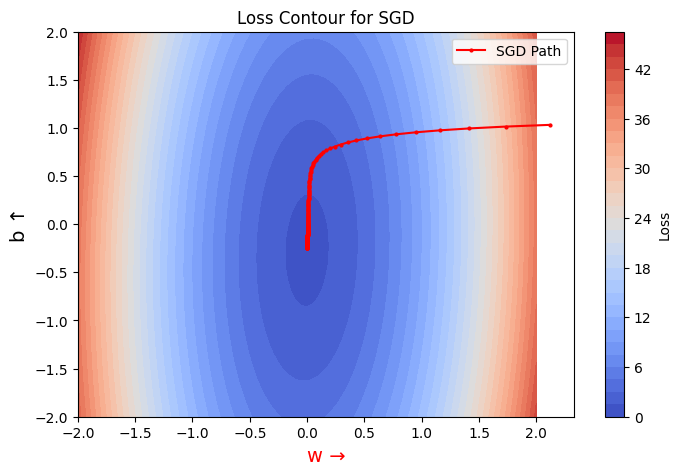

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data
np.random.seed(42)
X = np.random.uniform(-5, 5, (100, 2))  # Two input features
y = (np.sin(X[:, 0]) + np.cos(X[:, 1]) + 0.1 * np.random.randn(100)).reshape(-1, 1)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, learning_rate=0.01, optimizer='SGD'):
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        
        # Initialize weights and biases
        self.w = np.random.randn()
        self.b = np.random.randn()
        
        # Store updates for visualization
        self.w_history, self.b_history = [], []
        self.loss_history = []
        
    def forward(self, X):
        return self.w * X[:, 0] + self.b
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    
    def backward(self, X, y):
        y_pred = self.forward(X)
        loss = self.compute_loss(y_pred, y)
        self.loss_history.append(loss)
        
        # Store weights and biases for visualization
        self.w_history.append(self.w)
        self.b_history.append(self.b)
        
        # Compute gradients
        d_w = np.mean(2 * (y_pred - y) * X[:, 0])
        d_b = np.mean(2 * (y_pred - y))
        
        # Update parameters
        self.w -= self.learning_rate * d_w
        self.b -= self.learning_rate * d_b
        
        return loss

# Training and Visualization
def train_and_visualize(optimizer):
    nn = NeuralNetwork(optimizer=optimizer)
    for epoch in range(200):
        nn.backward(X, y)
    
    # Generate grid for contour plot
    w_vals = np.linspace(-2, 2, 100)
    b_vals = np.linspace(-2, 2, 100)
    W, B = np.meshgrid(w_vals, b_vals)
    Loss = np.zeros_like(W)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            temp_w = W[i, j]
            temp_b = B[i, j]
            y_pred = temp_w * X[:, 0] + temp_b
            Loss[i, j] = np.mean((y_pred - y) ** 2)
    
    # Plot contour with optimization trajectory
    plt.figure(figsize=(8, 5))
    plt.contourf(W, B, Loss, levels=30, cmap='coolwarm')
    plt.colorbar(label='Loss')
    
    w_vals = np.array(nn.w_history)
    b_vals = np.array(nn.b_history)
    
    plt.plot(w_vals, b_vals, 'r-', marker='o', markersize=2, label=f'{optimizer} Path')
    plt.xlabel('w →', fontsize=14, color='red')
    plt.ylabel('b ↑', fontsize=14, color='black')
    plt.title(f'Loss Contour for {optimizer}')
    plt.legend()
    plt.show()

train_and_visualize('SGD')


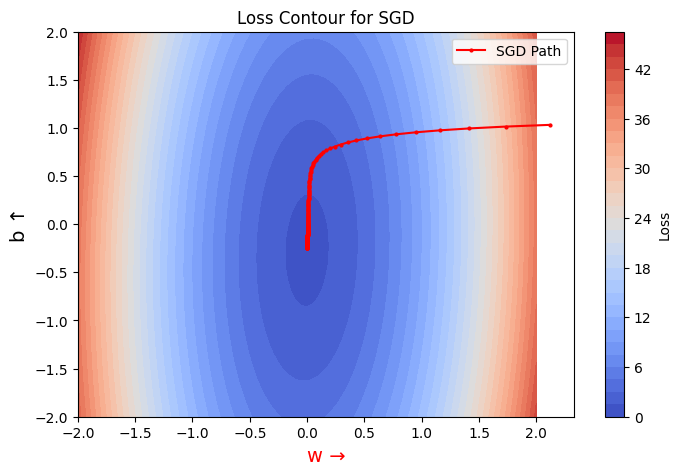

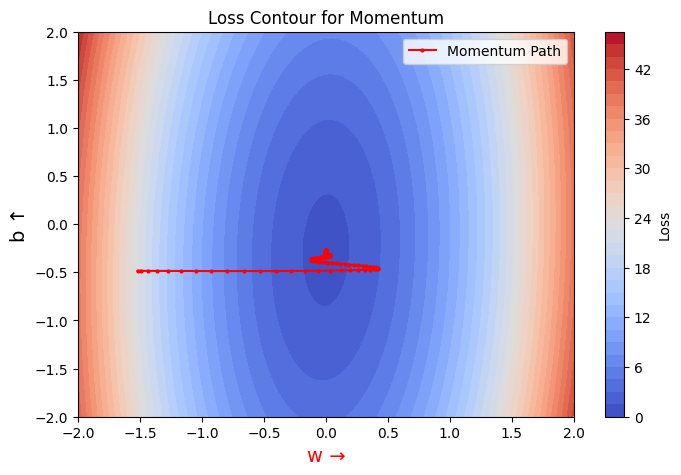

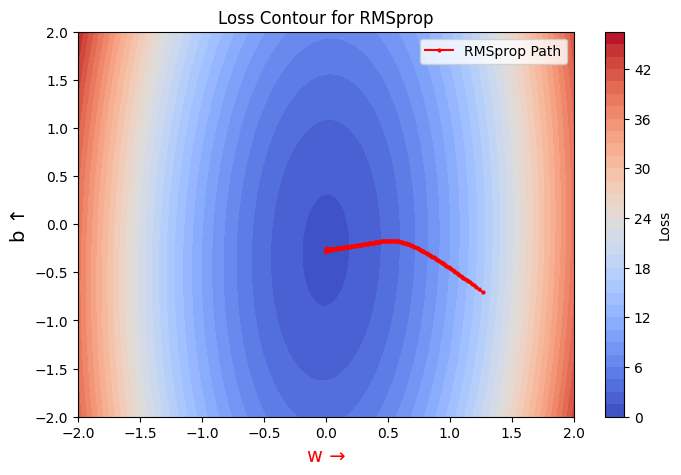

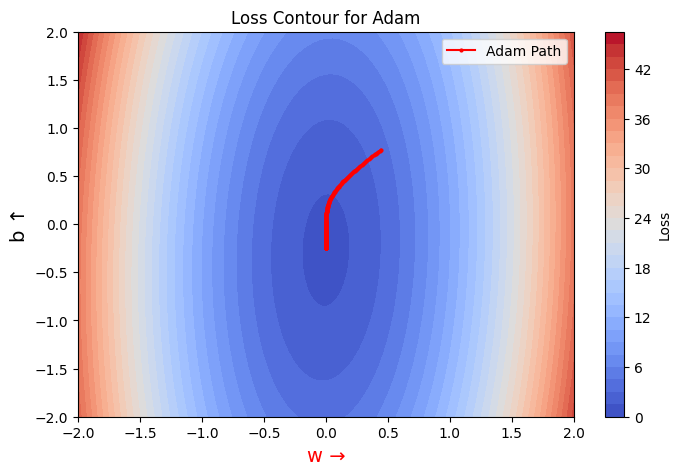

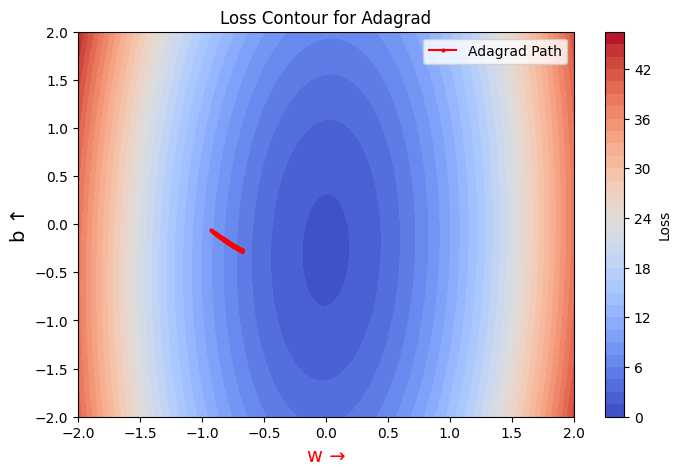

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data
np.random.seed(42)
X = np.random.uniform(-5, 5, (100, 2))  # Two input features
y = (np.sin(X[:, 0]) + np.cos(X[:, 1]) + 0.1 * np.random.randn(100)).reshape(-1, 1)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, learning_rate=0.01, optimizer='SGD'):
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.beta = 0.9  # Momentum factor
        self.epsilon = 1e-8
        self.beta1 = 0.9  # Adam parameter
        self.beta2 = 0.999  # Adam parameter
        
        # Initialize weights and biases
        self.w = np.random.randn()
        self.b = np.random.randn()
        
        # Store updates for visualization
        self.w_history, self.b_history = [], []
        self.loss_history = []
        
        # Initialize optimizer parameters
        self.v_w, self.v_b = 0, 0  # Momentum
        self.s_w, self.s_b = 0, 0  # RMSprop/Adam/Adagrad
        self.t = 0  # Adam time step
    
    def forward(self, X):
        return self.w * X[:, 0] + self.b
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    
    def backward(self, X, y):
        self.t += 1
        y_pred = self.forward(X)
        loss = self.compute_loss(y_pred, y)
        self.loss_history.append(loss)
        
        # Store weights and biases for visualization
        self.w_history.append(self.w)
        self.b_history.append(self.b)
        
        # Compute gradients
        d_w = np.mean(2 * (y_pred - y) * X[:, 0])
        d_b = np.mean(2 * (y_pred - y))
        
        # Apply optimizer updates
        if self.optimizer == 'SGD':
            self.w -= self.learning_rate * d_w
            self.b -= self.learning_rate * d_b
        elif self.optimizer == 'Momentum':
            self.v_w = self.beta * self.v_w + (1 - self.beta) * d_w
            self.v_b = self.beta * self.v_b + (1 - self.beta) * d_b
            self.w -= self.learning_rate * self.v_w
            self.b -= self.learning_rate * self.v_b
        elif self.optimizer == 'RMSprop':
            self.s_w = self.beta * self.s_w + (1 - self.beta) * (d_w ** 2)
            self.s_b = self.beta * self.s_b + (1 - self.beta) * (d_b ** 2)
            self.w -= self.learning_rate * d_w / (np.sqrt(self.s_w) + self.epsilon)
            self.b -= self.learning_rate * d_b / (np.sqrt(self.s_b) + self.epsilon)
        elif self.optimizer == 'Adam':
            self.v_w = self.beta1 * self.v_w + (1 - self.beta1) * d_w
            self.v_b = self.beta1 * self.v_b + (1 - self.beta1) * d_b
            self.s_w = self.beta2 * self.s_w + (1 - self.beta2) * (d_w ** 2)
            self.s_b = self.beta2 * self.s_b + (1 - self.beta2) * (d_b ** 2)
            v_w_corr = self.v_w / (1 - self.beta1 ** self.t)
            v_b_corr = self.v_b / (1 - self.beta1 ** self.t)
            s_w_corr = self.s_w / (1 - self.beta2 ** self.t)
            s_b_corr = self.s_b / (1 - self.beta2 ** self.t)
            self.w -= self.learning_rate * v_w_corr / (np.sqrt(s_w_corr) + self.epsilon)
            self.b -= self.learning_rate * v_b_corr / (np.sqrt(s_b_corr) + self.epsilon)
        elif self.optimizer == 'Adagrad':
            self.s_w += d_w ** 2 + self.epsilon  # Prevent division by zero
            self.s_b += d_b ** 2 + self.epsilon
            self.w -= (self.learning_rate / np.sqrt(self.s_w)) * d_w
            self.b -= (self.learning_rate / np.sqrt(self.s_b)) * d_b
        
        return loss

# Training and Visualization
def train_and_visualize(optimizer):
    nn = NeuralNetwork(optimizer=optimizer)
    for epoch in range(200):
        nn.backward(X, y)
    
    # Generate grid for contour plot
    w_vals = np.linspace(-2, 2, 100)
    b_vals = np.linspace(-2, 2, 100)
    W, B = np.meshgrid(w_vals, b_vals)
    Loss = np.zeros_like(W)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            temp_w = W[i, j]
            temp_b = B[i, j]
            y_pred = temp_w * X[:, 0] + temp_b
            Loss[i, j] = np.mean((y_pred - y) ** 2)
    
    # Plot contour with optimization trajectory
    plt.figure(figsize=(8, 5))
    plt.contourf(W, B, Loss, levels=30, cmap='coolwarm')
    plt.colorbar(label='Loss')
    
    w_vals = np.array(nn.w_history)
    b_vals = np.array(nn.b_history)
    
    plt.plot(w_vals, b_vals, 'r-', marker='o', markersize=2, label=f'{optimizer} Path')
    plt.xlabel('w →', fontsize=14, color='red')
    plt.ylabel('b ↑', fontsize=14, color='black')
    plt.title(f'Loss Contour for {optimizer}')
    plt.legend()
    plt.show()

optimizers = ['SGD', 'Momentum', 'RMSprop', 'Adam', 'Adagrad']
for opt in optimizers:
    train_and_visualize(opt)
